Step 1 — Load Dataset

In [ ]:
# Step 1 — Import Libraries
import pandas as pd
import numpy as np

# Step 2 — Load Data
train_data = pd.read_csv('/content/train (1).csv')
test_data = pd.read_csv('/content/test (1).csv')

# Step 3 — Show basic info
print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

train_data.head()


Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


📊 Step 2 — Exploratory Data Analysis (EDA)

EDA means:
👉 Understanding the dataset
👉 Checking missing values
👉 Understanding features
👉 Finding patterns

✅ 2.1 Import Visualization Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

✅ 2.2 Check Basic Information

This tells us:

Column names

Data types

Missing values

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

✅ 2.3 Statistical Summary


In [ ]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


✅ 2.4 Check Missing Values

In [ ]:
missing = train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending=False)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


✅ 2.5 Visualize Target Variable (SalePrice)

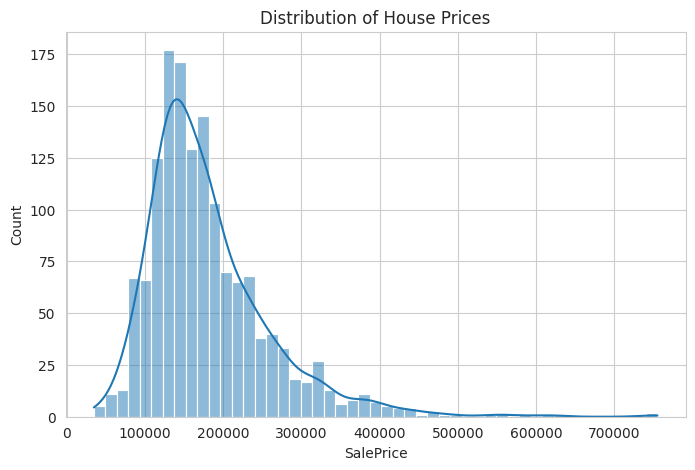

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title("Distribution of House Prices")
plt.show()

✅ 2.6 Correlation Heatmap

This shows relationships between numeric features.

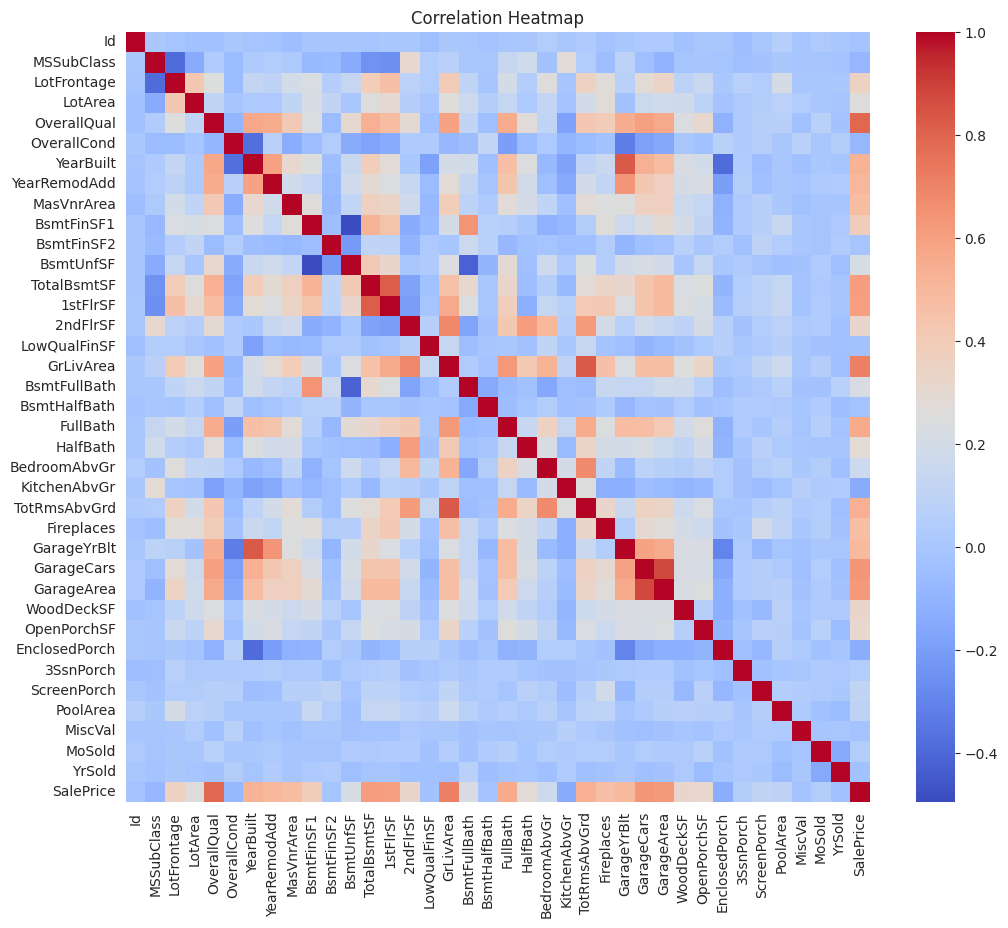

In [ ]:
plt.figure(figsize=(12,10))
corr = train_data.corr(numeric_only=True)

sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

✅ 2.7 Top Features Correlation with SalePrice

In [ ]:
top_corr = corr['SalePrice'].sort_values(ascending=False)
top_corr.head(10)


,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


✅ 2.8 Scatter Plot (Important Features)

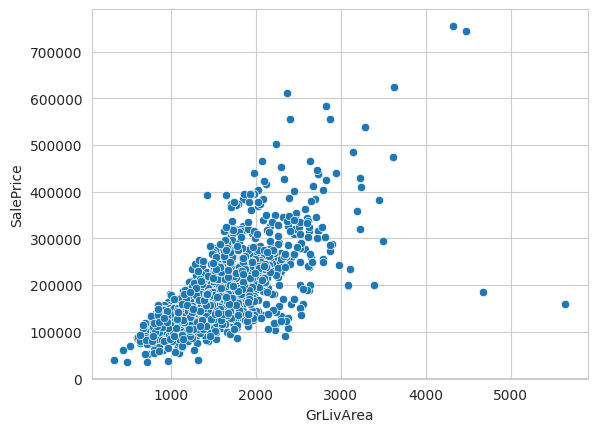

In [ ]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
plt.show()

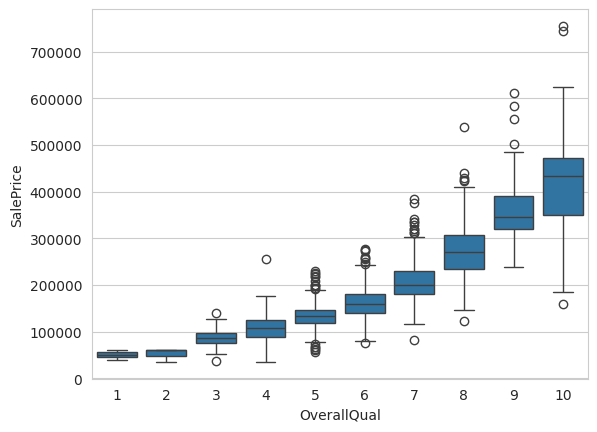

In [ ]:
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data)
plt.show()

Step 3 — Data Cleaning & Feature Engineering
What we will do:

✔️ Handle missing values
✔️ Drop useless columns
✔️ Convert categorical data → numeric
✔️ Prepare final ML-ready data
✅ 3.1 Separate Target Variable

In [ ]:
# Target variable
y = train_data['SalePrice']

# Drop target from features
X = train_data.drop('SalePrice', axis=1)

✅ 3.2 Drop Columns with TOO Many Missing Values

Columns with more than 40% missing data don’t help much.

In [ ]:
missing_ratio = X.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > 0.4].index

X = X.drop(cols_to_drop, axis=1)
test_data = test_data.drop(cols_to_drop, axis=1)

✅ 3.3 Handle Numerical Missing Values

We fill them using median (safe against outliers).

In [ ]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    X[col].fillna(X[col].median(), inplace=True)
    test_data[col].fillna(test_data[col].median(), inplace=True)


/tmp/ipython-input-2542027883.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)
/tmp/ipython-input-2542027883.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
✅ 3.4 Handle Categorical Missing Values

We fill them using mode (most frequent value).

In [ ]:
cat_cols = X.select_dtypes(include=['object']).columns

for col in cat_cols:
    X[col].fillna(X[col].mode()[0], inplace=True)
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

/tmp/ipython-input-2641540923.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mode()[0], inplace=True)
/tmp/ipython-input-2641540923.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

✅ 3.5 Convert Categorical → Numerical (One-Hot Encoding)

In [ ]:
X = pd.get_dummies(X, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)

✅ 3.6 Align Train & Test Columns

In [ ]:
X, test_data = X.align(test_data, join='left', axis=1)
test_data.fillna(0, inplace=True)

✅ 3.7 Final Check

In [ ]:
print("Training data shape:", X.shape)
print("Test data shape:", test_data.shape)

Training data shape: (1460, 230)
Test data shape: (1459, 230)


Step 4 — Train Machine Learning Models
Models we’ll train:

1️⃣ Linear Regression (baseline)
2️⃣ Random Forest Regressor (powerful, non-linear)
3️⃣ Compare performance

✅ 4.1 Train–Validation Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

✅ 4.2 Linear Regression Model
Train the model:

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

Predict & Evaluate:

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr_preds = lr_model.predict(X_val)

lr_mae = mean_absolute_error(y_val, lr_preds)
lr_rmse = np.sqrt(mean_squared_error(y_val, lr_preds))
lr_r2 = r2_score(y_val, lr_preds)

print("Linear Regression Results")
print("MAE:", lr_mae)
print("RMSE:", lr_rmse)
print("R2 Score:", lr_r2)

Linear Regression Results
MAE: 20384.191689710115
RMSE: 51992.04644679312
R2 Score: 0.6475804521595692


✅ 4.3 Random Forest Regressor
Train the model:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

Predict & Evaluate:

In [ ]:
rf_preds = rf_model.predict(X_val)

rf_mae = mean_absolute_error(y_val, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_preds))
rf_r2 = r2_score(y_val, rf_preds)

print("Random Forest Results")
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)
print("R2 Score:", rf_r2)

Random Forest Results
MAE: 17519.713253424656
RMSE: 28647.752824472474
R2 Score: 0.893004062705563


✅ 4.4 Model Comparison Table

In [ ]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [lr_mae, rf_mae],
    'RMSE': [lr_rmse, rf_rmse],
    'R2 Score': [lr_r2, rf_r2]
})

results


,Model,MAE,RMSE,R2 Score
0,Linear Regression,20384.191690,51992.046447,0.647580
1,Random Forest,17519.713253,28647.752824,0.893004


🚀 Step 5 — Final Model Training + Test Predictions
✅ 5.2 Train Final Model on FULL Training Data

In [ ]:
final_model = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

final_model.fit(X, y)

RandomForestRegressor(n_estimators=300, random_state=42)

✅ 5.3 Predict House Prices for Test Data

In [ ]:
test_predictions = final_model.predict(test_data)

✅ 5.4 Create Prediction File

In [ ]:
submission = pd.DataFrame({
    'Id': test_data.index + 1461,  # Kaggle test IDs start after train IDs
    'SalePrice': test_predictions
})

submission.head()

,Id,SalePrice
0,1461,129967.420000
1,1462,153381.666667
2,1463,182731.800000
3,1464,181198.426667
4,1465,198603.363333


✅ 5.5 Save Predictions to CSV

In [ ]:
submission.to_csv('house_price_predictions.csv', index=False)
print("Prediction file saved successfully!")

Prediction file saved successfully!
